# **Final project**

### In the development of multimetric index (MMI) based on biological communities, metrics should clearly discriminate between reference and disturbed sites. This is often determined via box plots that display no or little overlap between the quartiles of reference and disturbed sites (Pont et al., 2009; Stoddard et al., 2008). The preceding metric screening process markedly improves the capacity of MMIs to reliably assess anthropogenetic disturbances by reducing the influences of natural environmental gradients and sampling variability. **Notably, future MMI applications could benefit from examining divergences among metric sensitivities to better diagnose problems, rather than simply focusing on total MMI scores (Vadas et al., 2022)**

## Introduction


## Objetive 

### Design three functions to perform a normality test (Shapiro–Wilk), an ANOVA or Mann-Whiteny (if not normal), and a box-plot analysis of five metrics of the benthic macroinvertebrate community, in order to evaluate their individual responsiveness to anthropogenic disturbance and their potential for inclusion in a multimetric index (MMI)

### Import packages 

In [23]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import f_oneway
from scipy.stats import shapiro
from scipy.stats import kruskal

### Data loading 

In [ ]:
# Data frame
df = pd.read_csv("IBI_FINAL_RDA.csv")
df.columns
# Numerical columns
metrics = ['total_Abundance_Ajusted_elemean (+)',
       'crwalers_richness_Ajusted_slopemean (variable)',
       '%_temporary_attached (+)', '%_scrapers_Ajusted_tempmean (+)',
       'Richness_Diptera (-)']
# Factor
factor = ['class']


### Normality function

In [ ]:
#Shapiro-wilk function
def shapiro_wilk (df, columns, alpha=0.05): 
    resultados = []
    for col in columns: 
        data = df[col].dropna()
        stat, p = shapiro(data)
        interpretacion = "Normal" if p > alpha else "No normal"
        resultados.append(
            {"Columna": col, 
             "Estadistico W": stat, 
             "Valor p": p, 
             "Interpretacion": interpretacion,
        })
    return pd.DataFrame(resultados)    

# Function use 
shapiro_wilk(df, metrics)

,Columna,Estadistico W,Valor p,Interpretacion
0,total_Abundance_Ajusted_elemean (+),0.916437,0.000088,No normal
1,crwalers_richness_Ajusted_slopemean (variable),0.977409,0.186568,Normal
2,%_temporary_attached (+),0.939906,0.001224,No normal
3,%_scrapers_Ajusted_tempmean (+),0.964175,0.028798,No normal
4,Richness_Diptera (-),0.926308,0.000255,No normal


### Normality plot function

<Figure size 500x500 with 0 Axes>

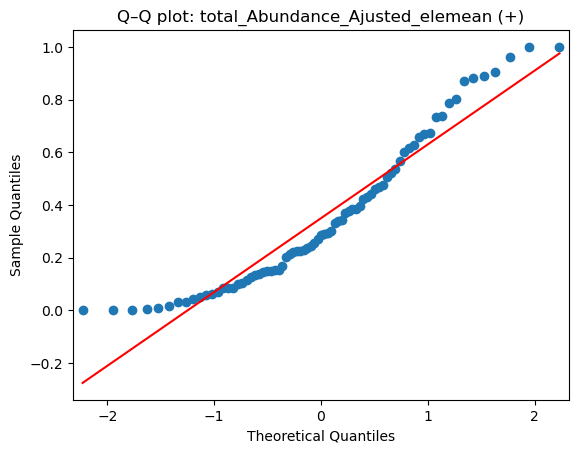

<Figure size 500x500 with 0 Axes>

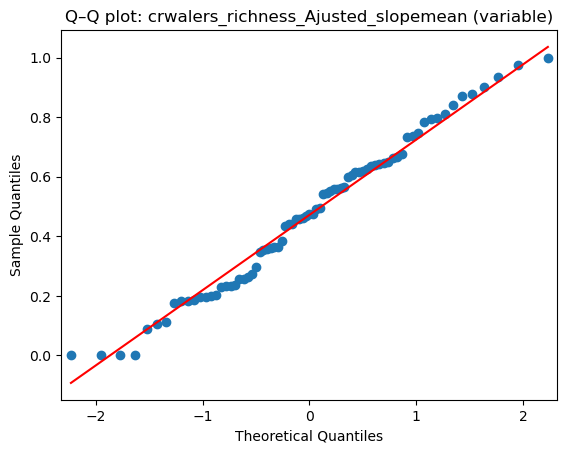

<Figure size 500x500 with 0 Axes>

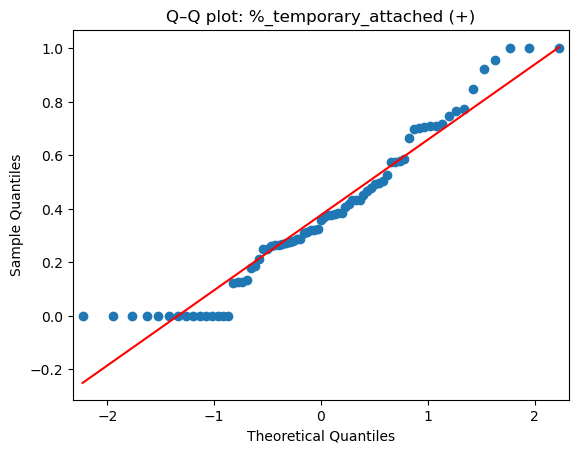

<Figure size 500x500 with 0 Axes>

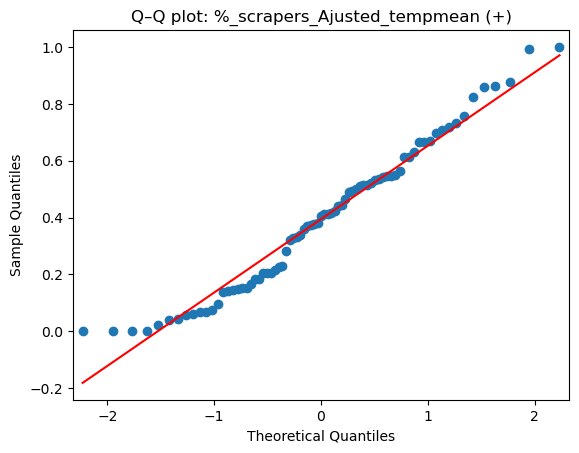

<Figure size 500x500 with 0 Axes>

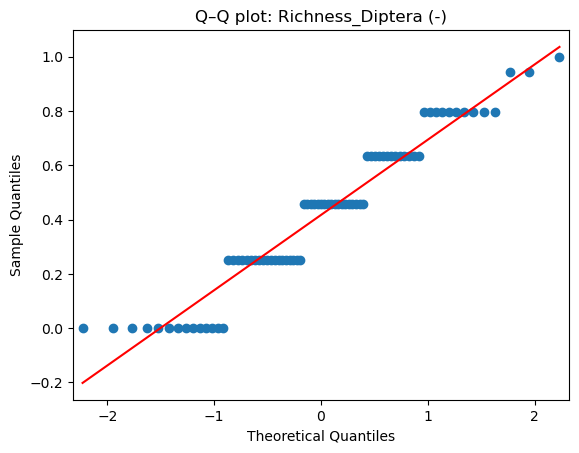

In [24]:
# QQplots function
def qqplots(df, columnas):
    for col in columnas:
        plt.figure(figsize=(5,5))
        sm.qqplot(df[col], line='s')
        plt.title(f"Q–Q plot: {col}")
        plt.show()

# Function use
qqplots(df, metrics)

### Kruskal-Wallis function

In [26]:
# Kruskal Wallis Function
def kruskal_multiple(df, columnas, factor, alpha = 0.05):

    resultados = {}
    
    for col in columnas:
        # Group numerical variables by factor
        grupos = [grupo[col].dropna().values for nombre, grupo in df.groupby(factor)]
        
        # Kruskal-Wallis
        h_stat, p_val = kruskal(*grupos)
        
        resultados[col] = {
            "H": h_stat,
            "p": p_val,
            "Significance": "Yes" if p_val < alpha else "No"
        }
    
    return pd.DataFrame(resultados).T

# Function use 
kruskal_multiple(df, metrics, factor = "class")

,H,p,Significance
total_Abundance_Ajusted_elemean (+),37.569359,0.0,Yes
crwalers_richness_Ajusted_slopemean (variable),49.957809,0.0,Yes
%_temporary_attached (+),33.154383,0.0,Yes
%_scrapers_Ajusted_tempmean (+),18.597772,0.000092,Yes
Richness_Diptera (-),37.406805,0.0,Yes


## Box-plot function 

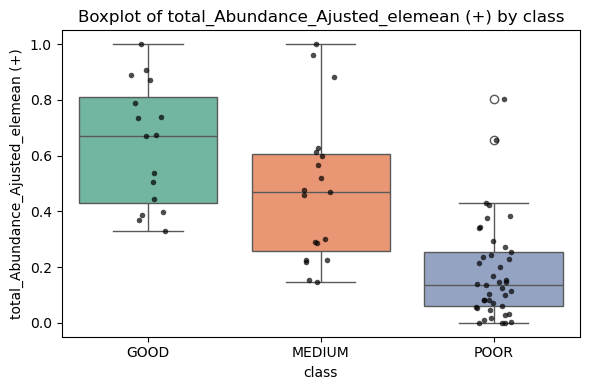

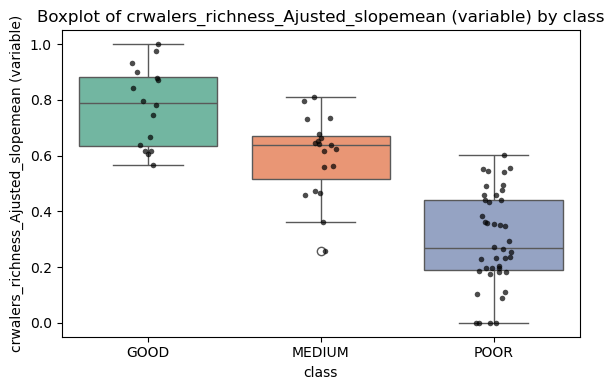

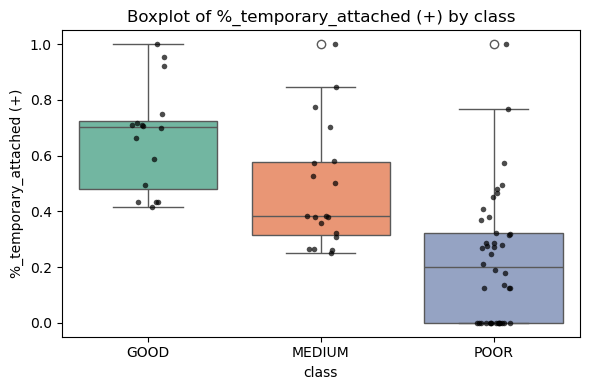

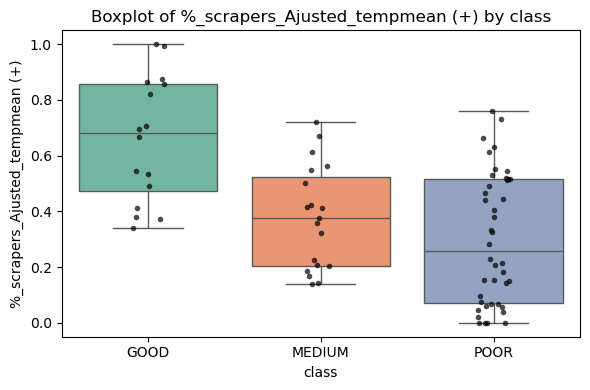

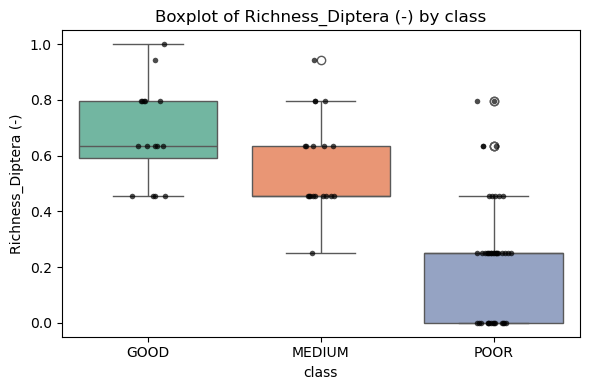

In [ ]:
# Box-plot function
def boxplots_multiple(df, columns, factor):

    for col in columns:
        plt.figure(figsize=(6,4))
        sns.boxplot(x=factor, y=col, data=df, hue=factor, palette="Set2", legend=False)
        sns.stripplot(x=factor, y=col, data=df, color="black", size=4, jitter=True, alpha=0.7)
        
        plt.title(f"Boxplot of {col} by {factor}")
        plt.xlabel(factor)
        plt.ylabel(col)
        plt.tight_layout()
        plt.show()
# Function use
boxplots_multiple(df, metrics, factor = "class")

## Conclusions

### Only one of the five metrics was normally distributed; therefore, we chose the Kruskal-Wallis test to evaluate statistical differences among ecological quality classes. In this regard, five metrics showed statistically significant differences (p < 0.05), and all boxplots exhibited little to no overlap. These results suggest that the five macroinvertebrate metrics are promising candidates for developing a future multimetric index (MMI). 

# References

### Vadas Jr, R. L., Hughes, R. M., Bae, Y. J., Baek, M. J., Gonzáles, O. C. B., Callisto, M., ... & Yoder, C. O. (2022). Assemblage-based biomonitoring of freshwater ecosystem health via multimetric indices: A critical review and suggestions for improving their applicability. Water Biology and Security, 1(3), 100054.
### Pont, D., Hughes, R. M., Whittier, T. R., & Schmutz, S. (2009). A predictive index of biotic integrity model for aquatic‐vertebrate assemblages of western US streams. Transactions of the american Fisheries Society, 138(2), 292-305.
### Stoddard, J. L., Herlihy, A. T., Peck, D. V., Hughes, R. M., Whittier, T. R., & Tarquinio, E. (2008). A process for creating multimetric indices for large-scale aquatic surveys. Journal of the North American Benthological Society, 27(4), 878-891.